# Titanic Survival Prediction
This notebook aims to predict the survival of passengers aboard the Titanic using various machine learning models. The workflow includes data exploration, preprocessing, feature engineering, visualization, model training, evaluation, and generating submission files.

## Table of Contents
1. [Importing Necessary Libraries](#importing-necessary-libraries)
2. [Loading and Previewing the Data](#loading-and-previewing-the-data)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Data Preprocessing and Feature Engineering](#data-preprocessing-and-feature-engineering)
5. [Encoding Categorical Variables](#encoding-categorical-variables)
6. [Splitting the Data into Training and Test Sets](#splitting-the-data-into-training-and-test-sets)
7. [Data Visualization](#data-visualization)
8. [Feature Correlation Analysis](#feature-correlation-analysis)
9. [Model Training and Evaluation](#model-training-and-evaluation)
10. [Feature Importance Analysis](#feature-importance-analysis)
11. [Generating Predictions and Submission File](#generating-predictions-and-submission-file)

## 1. Importing Necessary Libraries <a name="importing-necessary-libraries"></a>
**Explanation:**

In this section, we import all the necessary libraries required for data manipulation, visualization, preprocessing, model training, and evaluation.

**Data Manipulation and Visualization:**
- `pandas`: For handling and manipulating datasets.
- `numpy`: For numerical computations.
- `matplotlib.pyplot` and `seaborn`: For creating various visualizations to understand data patterns and relationships.

**Machine Learning and Preprocessing:**
- `scikit-learn` modules: For preprocessing data, splitting datasets, training models, and evaluating performance.
- `XGBoost`, `LightGBM`, and `CatBoost`: Powerful gradient boosting frameworks for efficient and accurate predictions.

**Miscellaneous:**
- `warnings` and `logging`: To suppress unnecessary warnings and control logging output for cleaner notebook presentation.


In [40]:
# Data Manipulation and Visualization Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

# Preprocessing and Model Evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## 2. Loading and Previewing the Data <a name="loading-and-previewing-the-data"></a>

**Explanation:**  
Here, we load the training and test datasets into Pandas DataFrames and perform an initial preview to understand the structure and content of the data.

#### Loading Data:
The datasets are loaded from specified file paths using `pd.read_csv()`.

#### Previewing Data:
head() method displays the first few rows of the datasets, providing a glimpse into the data and its features.

In [41]:
train_data = pd.read_csv('../data/titanic/train.csv')
test_data = pd.read_csv('../data/titanic/test.csv')

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

## 3. Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis-eda"></a>

**Explanation:**  
In this section, we conduct an exploratory analysis to understand the dataset's characteristics, identify missing values, and observe basic statistical measures.

### Summary Statistics:
The `describe()` method provides statistical insights such as mean, median, standard deviation, and quartiles for numerical features.

### Missing Values Detection:
isnull().sum() identifies the number of missing entries in each feature, helping us plan appropriate data cleaning strategies.

In [42]:
# Display summary statistics
print("\nSummary Statistics:")
print(train_data.describe())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())



Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values in Training Data:
PassengerId      0
Survive

## 4. Data Preprocessing and Feature Engineering <a name="data-preprocessing-and-feature-engineering"></a>

**Explanation:**  
We preprocess the data by handling missing values and creating new features to enhance model performance.

#### Combining Datasets:
Training and test datasets are concatenated for consistent preprocessing using `pd.concat()`.

In [43]:
# Combine train and test for consistent preprocessing
combined = pd.concat([train_data, test_data], sort=False)


#### Handling Missing Values:
- **Age:** Missing values are filled with the median age.
- **Embarked:** Missing values are filled with the mode (most frequent value).
- **Fare:** Missing values are filled with the median fare.

In [44]:
# Fill missing Age with median
combined['Age']= combined['Age'].fillna(combined['Age'].median())

# Fill missing Embarked with mode
combined['Embarked']= combined['Embarked'].fillna(combined['Embarked'].mode()[0])

# Fill missing Fare in test set with median
combined['Fare']=combined['Fare'].fillna(combined['Fare'].median())
print(combined.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [45]:
# Create a new feature for Cabin presence
combined['Has_Cabin'] = combined['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop Cabin as it's largely missing
combined= combined.drop(['Cabin'], axis=1)

# Display the head after filling missing values and dropping columns
print("\nCombined Data After Filling Missing Values and Dropping Columns:")
print(combined.head())


Combined Data After Filling Missing Values and Dropping Columns:
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            11

#### Creating New Features:
- **Title Extraction:** Titles are extracted from the 'Name' feature and grouped into common categories to capture social status and relationships.
- **Family Size:** Calculated by adding 'SibSp' and 'Parch' plus one (for self), indicating family size onboard.
- **IsAlone:** A binary feature indicating whether the passenger was alone or with family.
- **Has_Cabin:** A binary feature indicating whether the passenger had a cabin number listed, which may correlate with socio-economic status.

In [46]:
# Extract Title from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                               'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                               'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace(['Mlle', 'Ms'], 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Create Family Size
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1

# Create IsAlone feature
combined['IsAlone'] = 1  # Initialize to 1 (meaning alone)
combined.loc[combined['FamilySize'] > 1, 'IsAlone'] = 0

print(combined.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin Title  FamilySize  \
0      0         A/5 21171   7.2500        S          0    Mr           2   
1      0          PC 17599  71.2833        C          1   Mrs           2   
2      0  STON/O2. 3101282   7.9250        S          0  Miss           1   
3      0    

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\prana\AppData\Local\Temp\ipykernel_22272\4210024676.py:2: SyntaxWarning: invalid escape sequence '\.'
  combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



#### Dropping Unnecessary Features:
Features like 'Name', 'Ticket', and 'Cabin' are dropped as they are either redundant after feature engineering or contain too many missing values.

In [47]:
# Drop unnecessary columns
combined.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Display the head after feature engineering
print("\nCombined Data After Feature Engineering:")
print(combined.head())


Combined Data After Feature Engineering:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1       0.0       3    male  22.0      1      0   7.2500   
1            2       1.0       1  female  38.0      1      0  71.2833   
2            3       1.0       3  female  26.0      0      0   7.9250   
3            4       1.0       1  female  35.0      1      0  53.1000   
4            5       0.0       3    male  35.0      0      0   8.0500   

  Embarked  Has_Cabin Title  FamilySize  IsAlone  
0        S          0    Mr           2        0  
1        C          1   Mrs           2        0  
2        S          0  Miss           1        1  
3        S          1   Mrs           2        0  
4        S          0    Mr           1        1  


## 5. Encoding Categorical Variables <a name="encoding-categorical-variables"></a>

**Explanation:**  
Categorical variables are converted into numerical formats suitable for machine learning algorithms.

#### Encoding Sex Feature:
Mapped 'male' to 0 and 'female' to 1.

#### Encoding Title Feature:
Label encoding is applied to the 'Title' feature to convert categorical titles into numeric labels.

In [48]:
# Encode Sex: Male = 0, Female = 1
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
combined = pd.get_dummies(combined, columns=['Embarked'], prefix='Embarked')

# Label encode Title
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined['Title'] = label_encoder.fit_transform(combined['Title'])

# Display the head after encoding
print("\nCombined Data After Encoding:")
print(combined.head())


Combined Data After Encoding:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  \
0            1       0.0       3    0  22.0      1      0   7.2500          0   
1            2       1.0       1    1  38.0      1      0  71.2833          1   
2            3       1.0       3    1  26.0      0      0   7.9250          0   
3            4       1.0       1    1  35.0      1      0  53.1000          1   
4            5       0.0       3    0  35.0      0      0   8.0500          0   

   Title  FamilySize  IsAlone  Embarked_C  Embarked_Q  Embarked_S  
0      2           2        0       False       False        True  
1      3           2        0        True       False       False  
2      1           1        1       False       False        True  
3      3           2        0       False       False        True  
4      2           1        1       False       False        True  



#### One-Hot Encoding Embarked Feature:
The 'Embarked' feature is transformed into dummy variables using `pd.get_dummies()`, creating separate columns for each embarkation point.

In [49]:
# Combine the one-hot encoded columns into a single 'Embarked' column
combined['Embarked'] = combined[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1)

# Map the 'Embarked' values to integers
combined['Embarked'] = combined['Embarked'].map({'Embarked_C': 0, 'Embarked_Q': 1, 'Embarked_S': 2})

# Drop the old one-hot encoded columns
combined.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

# Display the head after merging Embarked columns
print("\nCombined Data After Merging Embarked Columns:")
print(combined.head())



Combined Data After Merging Embarked Columns:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  \
0            1       0.0       3    0  22.0      1      0   7.2500          0   
1            2       1.0       1    1  38.0      1      0  71.2833          1   
2            3       1.0       3    1  26.0      0      0   7.9250          0   
3            4       1.0       1    1  35.0      1      0  53.1000          1   
4            5       0.0       3    0  35.0      0      0   8.0500          0   

   Title  FamilySize  IsAlone  Embarked  
0      2           2        0         2  
1      3           2        0         0  
2      1           1        1         2  
3      3           2        0         2  
4      2           1        1         2  


## 6. Splitting the Data into Training and Test Sets <a name="splitting-the-data-into-training-and-test-sets"></a>

**Explanation:**  
The combined dataset is split back into the original training and test sets after preprocessing and feature engineering.

#### Training Data:
The original training data is extracted from the combined dataset.

#### Test Data:
The original test data is extracted from the combined dataset.

#### Separating Features and Target Variable:
The 'Survived' column is separated as the target variable for the training data.


In [50]:
# Split the combined dataset back into train and test sets
train = combined[combined['Survived'].notna()]
test = combined[combined['Survived'].isna()]

# Drop the 'Survived' column from the test set
test=test.drop('Survived', axis=1)

# Reorder columns: 'Survived' first for the train set, 'PassengerId' first for the test set
train = train[['Survived'] + [col for col in train.columns if col != 'Survived']]
test = test[['PassengerId'] + [col for col in test.columns if col != 'PassengerId']]

# Display the head after splitting back into train and test sets
print("\nTrain Data Head After Splitting:")
print(train.head())

print("\nTest Data Head After Splitting:")
print(test.head())


Train Data Head After Splitting:
   Survived  PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  \
0       0.0            1       3    0  22.0      1      0   7.2500          0   
1       1.0            2       1    1  38.0      1      0  71.2833          1   
2       1.0            3       3    1  26.0      0      0   7.9250          0   
3       1.0            4       1    1  35.0      1      0  53.1000          1   
4       0.0            5       3    0  35.0      0      0   8.0500          0   

   Title  FamilySize  IsAlone  Embarked  
0      2           2        0         2  
1      3           2        0         0  
2      1           1        1         2  
3      3           2        0         2  
4      2           1        1         2  

Test Data Head After Splitting:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  Title  \
0          892       3    0  34.5      0      0   7.8292          0      2   
1          893       3    1  47.0     

## 7. Data Visualization <a name="data-visualization"></a>

**Explanation:**  
Visualizations are created to understand the distribution of features and their relationship with the target variable 'Survived'.

#### Distribution Plots:
Histograms and count plots show the distribution of numerical and categorical features.

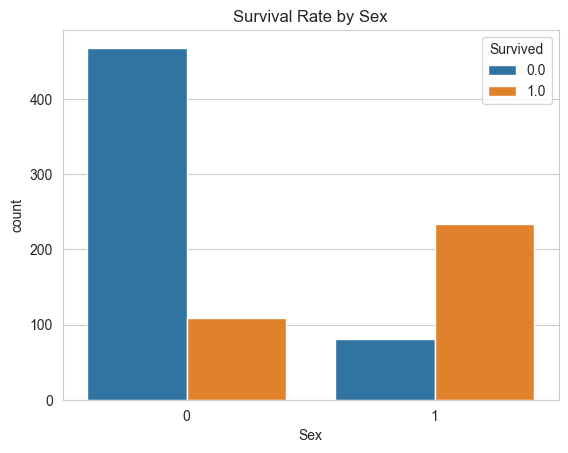

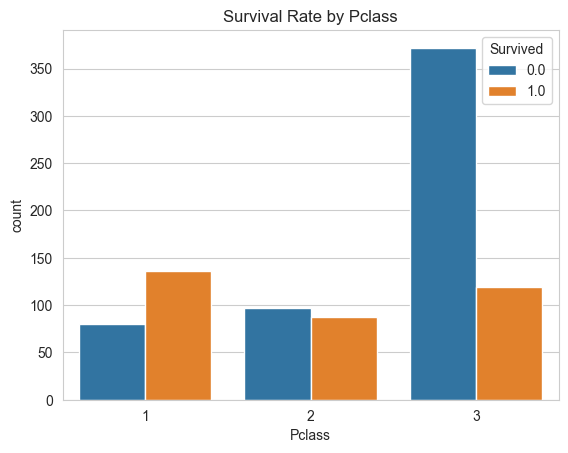

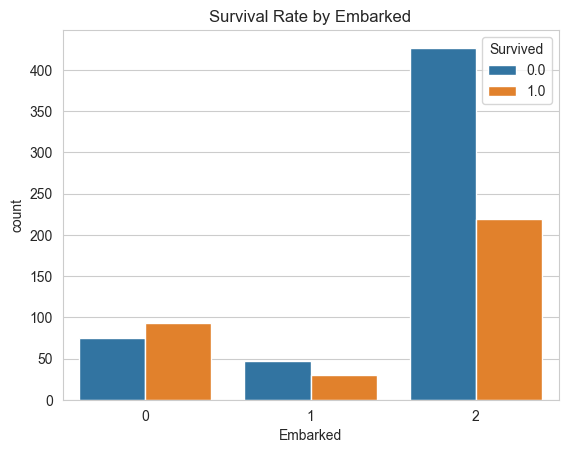

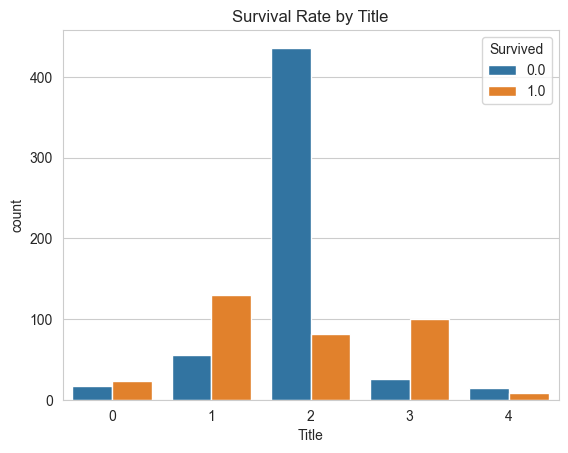

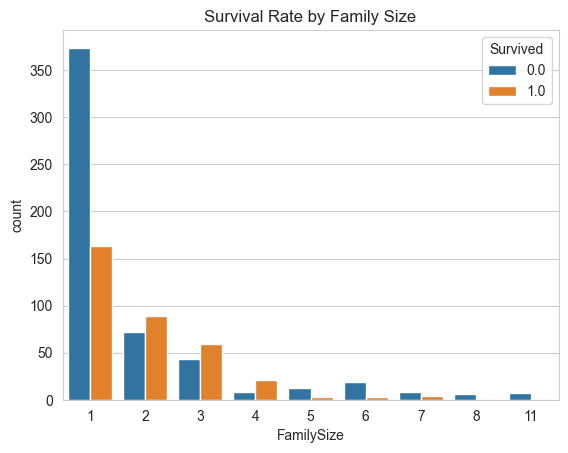

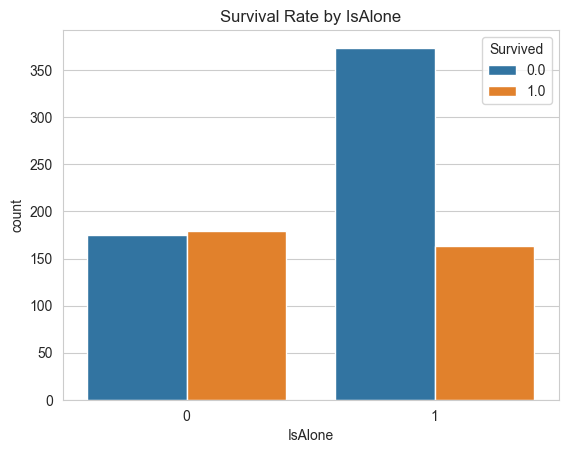

In [51]:
# Survival Rate by Sex
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

# Survival Rate by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival Rate by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.show()

# Survival Rate by Title
sns.countplot(x='Title', hue='Survived', data=train)
plt.title('Survival Rate by Title')
plt.show()

# Survival Rate by FamilySize
sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title('Survival Rate by Family Size')
plt.show()

# Survival Rate by IsAlone
sns.countplot(x='IsAlone', hue='Survived', data=train)
plt.title('Survival Rate by IsAlone')
plt.show()


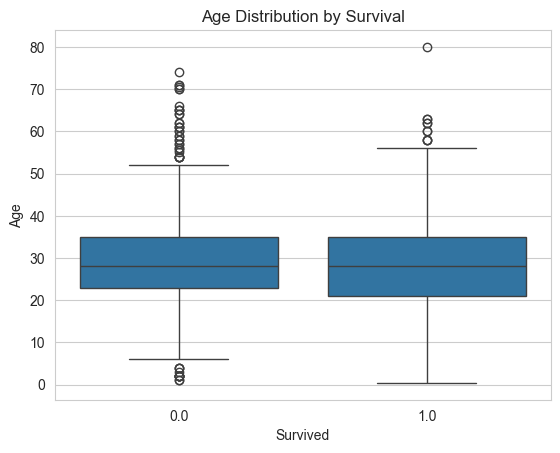

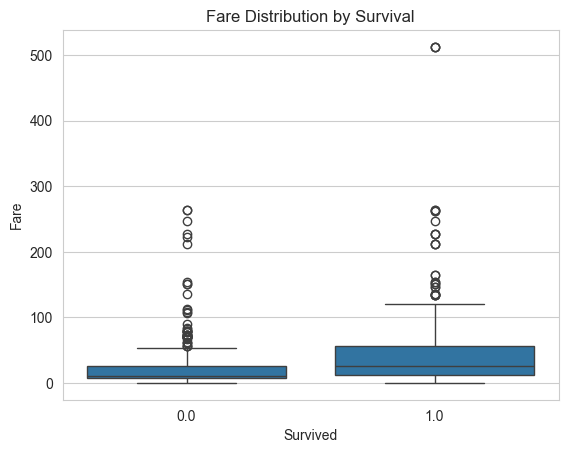

In [52]:
# Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()

# Boxplot of Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival')
plt.show()


## 8. Feature Correlation Analysis <a name="feature-correlation-analysis"></a>

#### Correlation Heatmap:
A heatmap visualizes correlations between features, helping identify multicollinearity and important relationships.


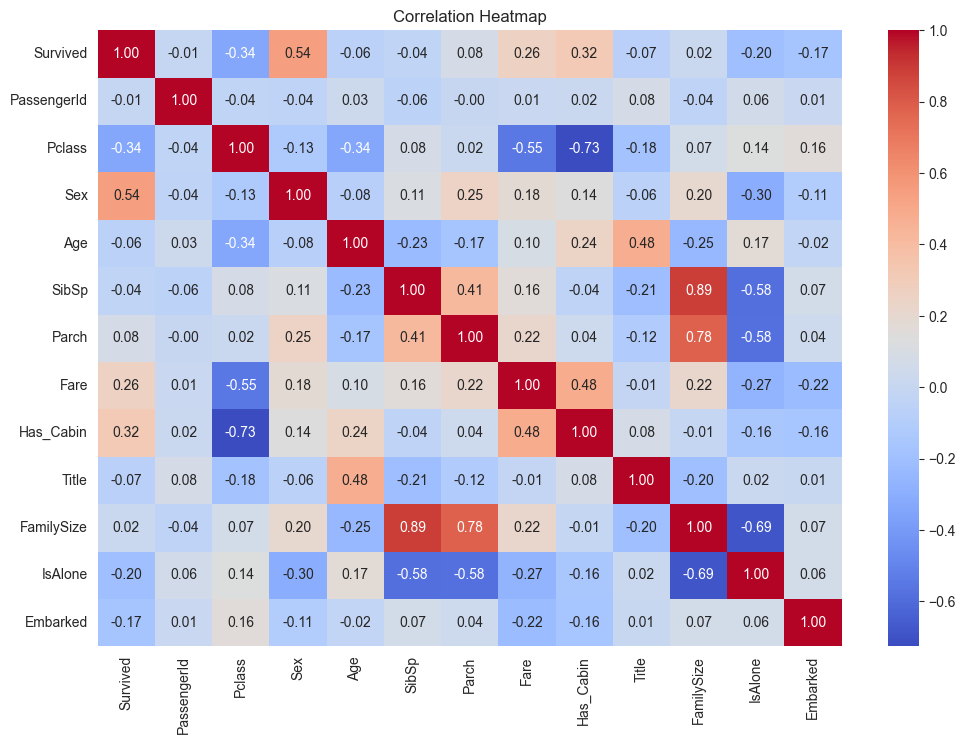

In [53]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


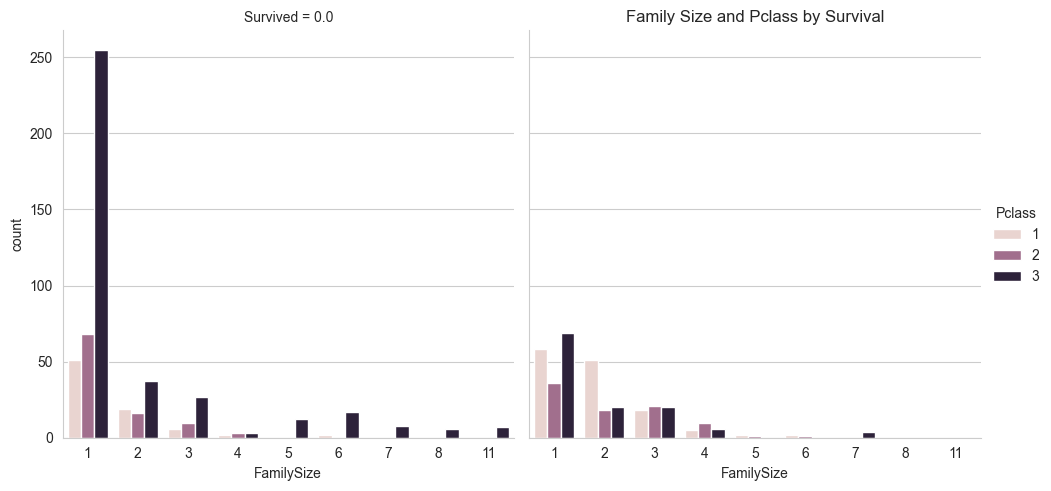

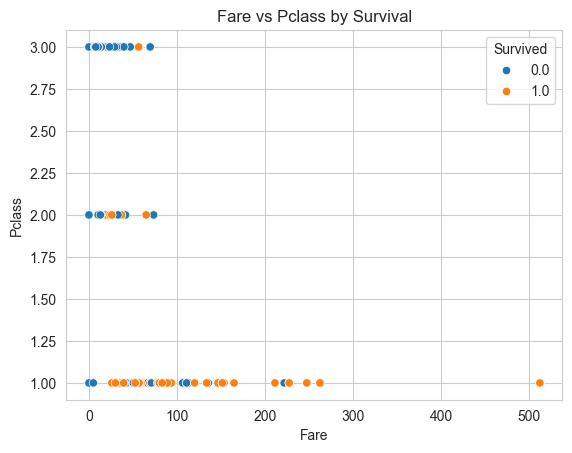

In [54]:
# Survival rate by Family Size and Pclass
sns.catplot(x='FamilySize', hue='Pclass', col='Survived', kind='count', data=train)
plt.title('Family Size and Pclass by Survival')
plt.show()

# Survival rate by Fare and Pclass
sns.scatterplot(x='Fare', y='Pclass', hue='Survived', data=train)
plt.title('Fare vs Pclass by Survival')
plt.show()


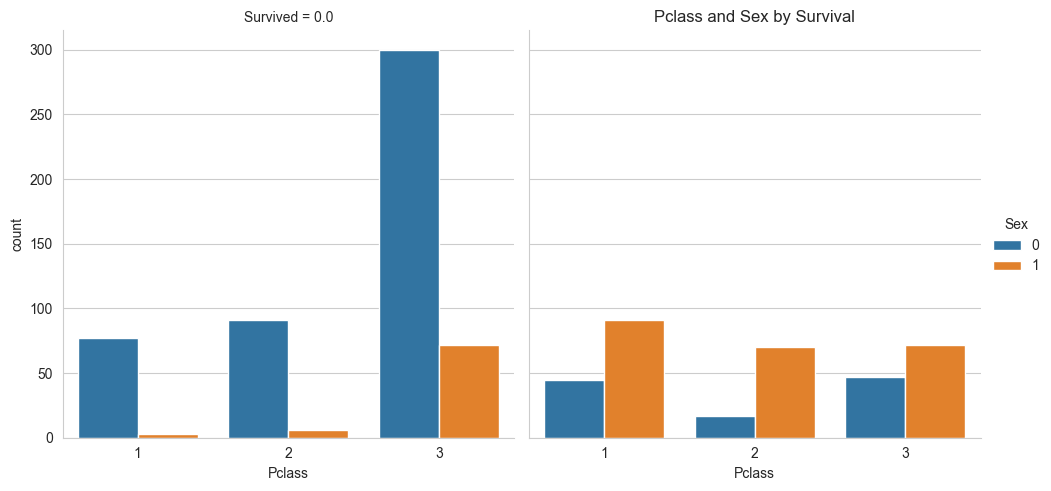

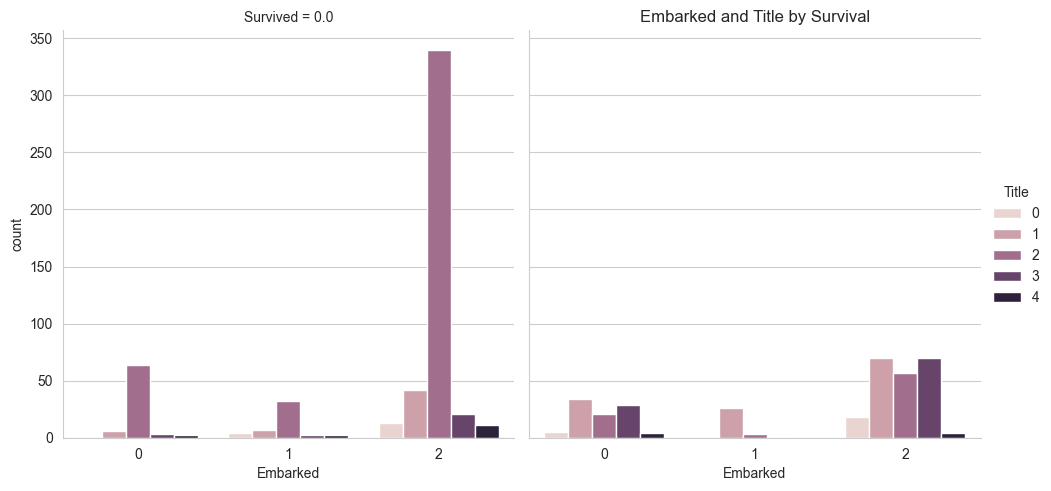

In [55]:
# Survival rate by Pclass and Sex combined
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=train)
plt.title('Pclass and Sex by Survival')
plt.show()

# Survival rate by Embarked and Title combined
sns.catplot(x='Embarked', hue='Title', col='Survived', kind='count', data=train)
plt.title('Embarked and Title by Survival')
plt.show()


In [56]:
# Separate the features (X) and target (y) in the training dataset
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure everything is correct
print("\nTrain and Validation Set Shapes:")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


Train and Validation Set Shapes:
(712, 12) (179, 12) (712,) (179,)


## 9. Model Training and Evaluation <a name="model-training-and-evaluation"></a>

**Explanation:**  
Multiple machine learning models are trained, and their performance is evaluated using cross-validation. Hyperparameter tuning is performed using GridSearchCV to optimize model performance.

#### Model Selection:
A variety of models are evaluated to find the best-performing one.

#### Cross-Validation:
Cross-validation scores help compare model performance and ensure robustness.


In [58]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
# Initialize the models with improved settings and additional models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Fit the models and evaluate on validation set
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val_scaled)
    
    # Print accuracy and classification report
    print(f"\n{name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(classification_report(y_val, y_pred))
    print("-" * 50)



Logistic Regression Accuracy: 0.8045
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------

Random Forest Accuracy: 0.8659
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       105
         1.0       0.85      0.82      0.84        74

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179

--------------------------------------------------

XGBoost Accuracy: 0.8156
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       105
         1.0       0.79      0.76      

D:\workshop\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 0.8101
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

--------------------------------------------------

SVM Accuracy: 0.8156
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

--------------------------------------------------


In [59]:
# Based on the evaluations, select the best-performing model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Final evaluation on validation set
y_pred = best_model.predict(X_val)
final_accuracy = accuracy_score(y_val, y_pred)
print(f"Final Model Accuracy: {final_accuracy:.4f}")
print(classification_report(y_val, y_pred))


Final Model Accuracy: 0.8659
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       105
         1.0       0.85      0.82      0.84        74

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [60]:
# Dictionary to store accuracy scores
accuracy_scores = {}

# Fit the models and calculate accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy_scores[name] = accuracy_score(y_val, y_pred)

# Convert accuracy scores to DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted accuracy table
print(accuracy_df)

D:\workshop\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy
1        Random Forest  0.865922
2              XGBoost  0.815642
3    Gradient Boosting  0.815642
5                  SVM  0.815642
4             AdaBoost  0.810056
0  Logistic Regression  0.804469


## 10. Feature Importance Analysis <a name="feature-importance-analysis"></a>

**Explanation:**  
Feature importance is analyzed to understand which features contribute most to the model's predictions.

#### Random Forest Feature Importance:
The feature importance is extracted from the `RandomForestClassifier` and visualized.


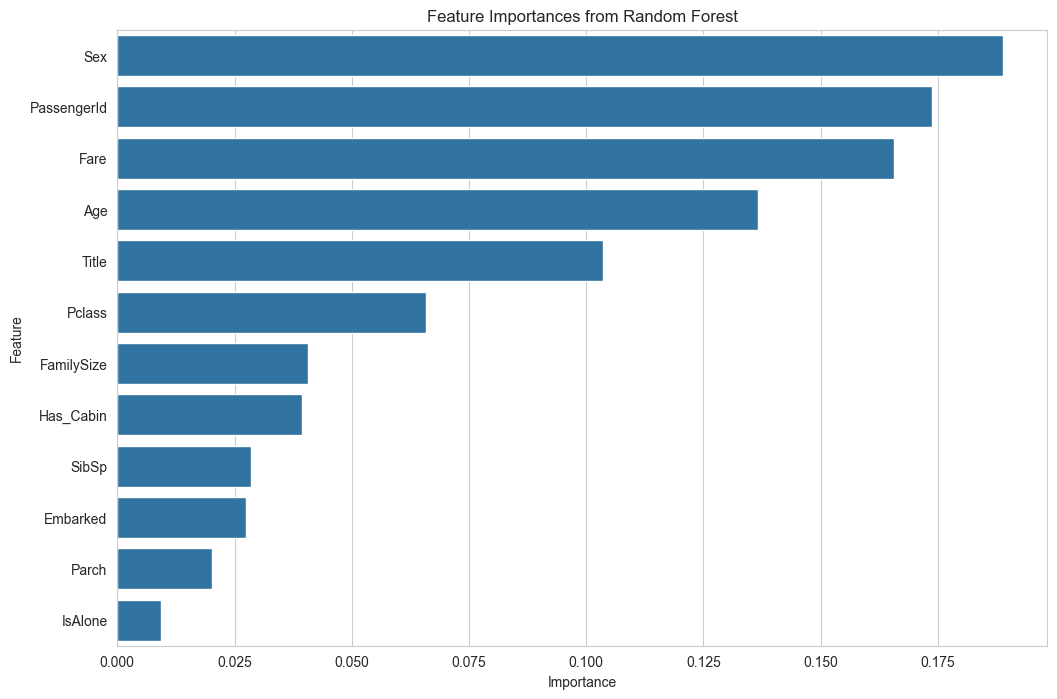

In [61]:
# Fit Random Forest model again to extract feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

Correlation with Survived:
 Survived       1.000000
Sex            0.543351
Has_Cabin      0.316912
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Title         -0.071174
Embarked      -0.167675
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


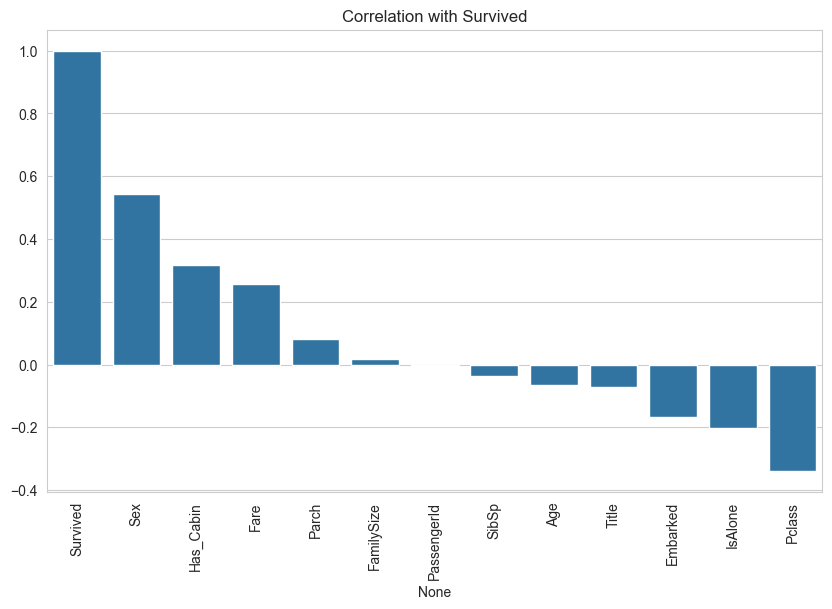

In [62]:
# Calculate correlations with target variable
corr_with_target = train.corr()['Survived'].sort_values(ascending=False)
print("Correlation with Survived:\n", corr_with_target)

# Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.title('Correlation with Survived')
plt.xticks(rotation=90)
plt.show()


## 11. Generating Predictions and Submission File <a name="generating-predictions-and-submission-file"></a>

**Explanation:**  
The final model is trained on the entire training set, and predictions are generated for the test set. A submission file is created for submission to Kaggle.

#### Model Training:
The best-performing model is retrained on the full training dataset.

#### Prediction:
Predictions are made on the test dataset.

#### Submission File:
The predictions are formatted as required by the Kaggle competition and saved as a CSV file.


In [63]:
best_model = models["Random Forest"]

# Fit the model to the entire training data
best_model.fit(X, y)

# Generate predictions for the test data
test_predictions = best_model.predict(test)


# Create a DataFrame for submission
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_predictions
})

# Ensure the format is correct
submission.head()
# submission.to_csv('../output/submission.csv', index=False)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [64]:
submission.to_csv('../data/titanic/submission.csv', index=False)